In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('data.txt')

data

array([[6947.2, 6983.2, 6969.6, 7004.8],
       [6340. , 6247.2, 6273.6, 6144. ],
       [2003.2, 1959.2, 1983.2, 1933.6],
       ...,
       [2035.2, 2106.4, 2107.2, 2182.4],
       [7205.6, 7161.6, 7070.4, 6969.6],
       [2480.8, 2601.6, 2609.6, 2623.2]])

In [ ]:
# Габаритные размеры камеры 4000×508×112 мм3

# скорость дрейфа составляет около 4.5 сантиметров за микросекунду

# Время смещения (t1) = 1836.2 нн
# Время смещения (t2) = 1784.6480000000001 нн
# Время смещения (t3) = 1771.8320000000003 нн
# Время смещения (t4) = 1782.9600000000003 нн

In [ ]:
t1_s = 1836.2
t2_s = 1784.6480000000001
t3_s = 1771.8320000000003
t4_s = 1782.9600000000003

In [ ]:
df = pd.DataFrame(data, columns=['t1','t2','t3','t4'])
df

,t1,t2,t3,t4
0,6947.2,6983.2,6969.6,7004.8
1,6340.0,6247.2,6273.6,6144.0
2,2003.2,1959.2,1983.2,1933.6
3,2212.0,2333.6,2369.6,2482.4
4,2485.6,2540.0,2524.0,2548.0
...,...,...,...,...
51111,3557.6,3537.6,3438.4,3432.0
51112,5115.2,5164.0,5155.2,5172.0
51113,2035.2,2106.4,2107.2,2182.4
51114,7205.6,7161.6,7070.4,6969.6


In [ ]:
df['t1'] = df['t1'] - t1_s
df['t2'] = df['t2'] - t2_s
df['t3'] = df['t3'] - t3_s
df['t4'] = df['t4'] - t4_s

df = df/1000
df

,t1,t2,t3,t4
0,5.1110,5.198552,5.197768,5.22184
1,4.5038,4.462552,4.501768,4.36104
2,0.1670,0.174552,0.211368,0.15064
3,0.3758,0.548952,0.597768,0.69944
4,0.6494,0.755352,0.752168,0.76504
...,...,...,...,...
51111,1.7214,1.752952,1.666568,1.64904
51112,3.2790,3.379352,3.383368,3.38904
51113,0.1990,0.321752,0.335368,0.39944
51114,5.3694,5.376952,5.298568,5.18664


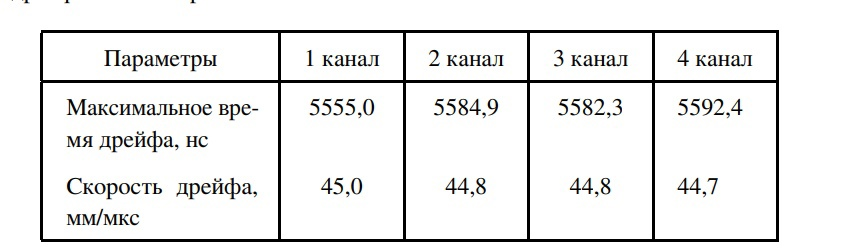

In [ ]:
df['t1'] = df['t1']*45
df['t2'] = df['t2']*44.8
df['t3'] = df['t3']*44.8
df['t4'] = df['t4']*44.7

df

,t1,t2,t3,t4
0,229.995,232.89513,232.860006,233.416248
1,202.671,199.92233,201.679206,194.938488
2,7.515,7.81993,9.469286,6.733608
3,16.911,24.59305,26.780006,31.264968
4,29.223,33.83977,33.697126,34.197288
...,...,...,...,...
51111,77.463,78.53225,74.662246,73.712088
51112,147.555,151.39497,151.574886,151.490088
51113,8.955,14.41449,15.024486,17.854968
51114,241.623,240.88745,237.375846,231.842808


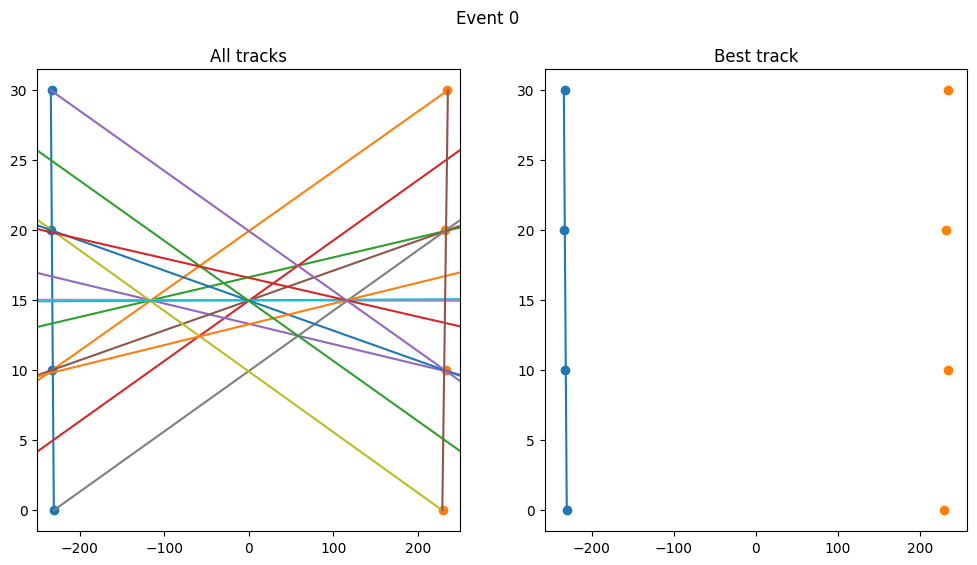

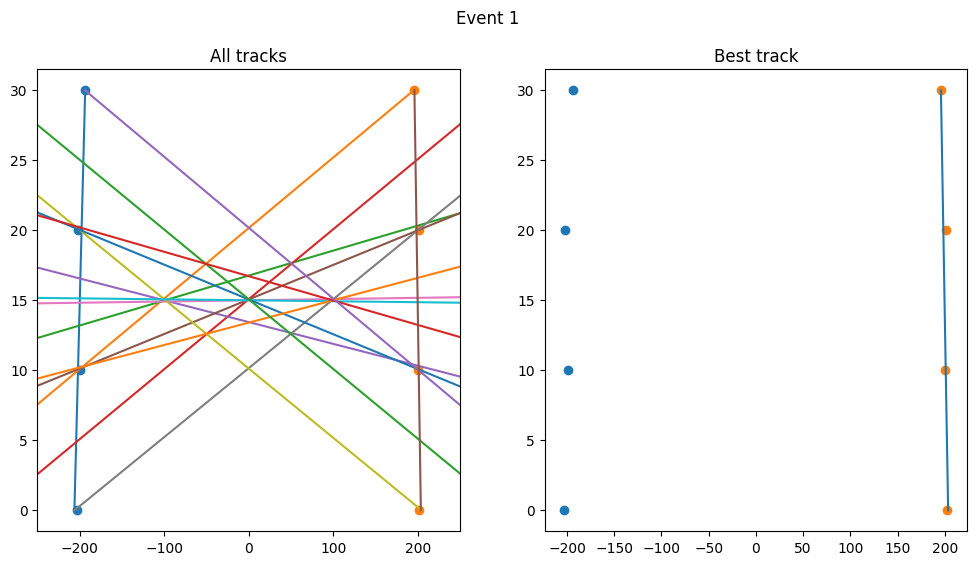

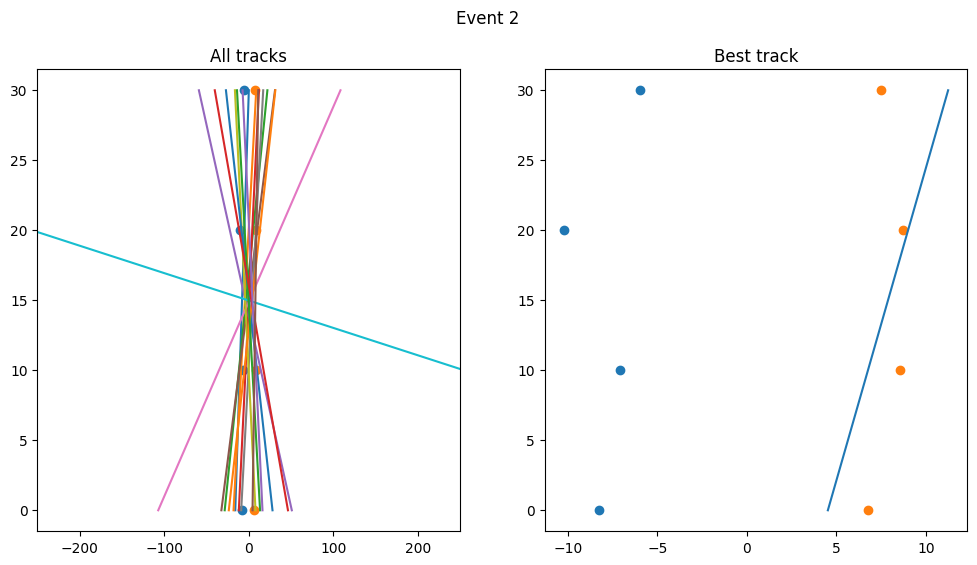

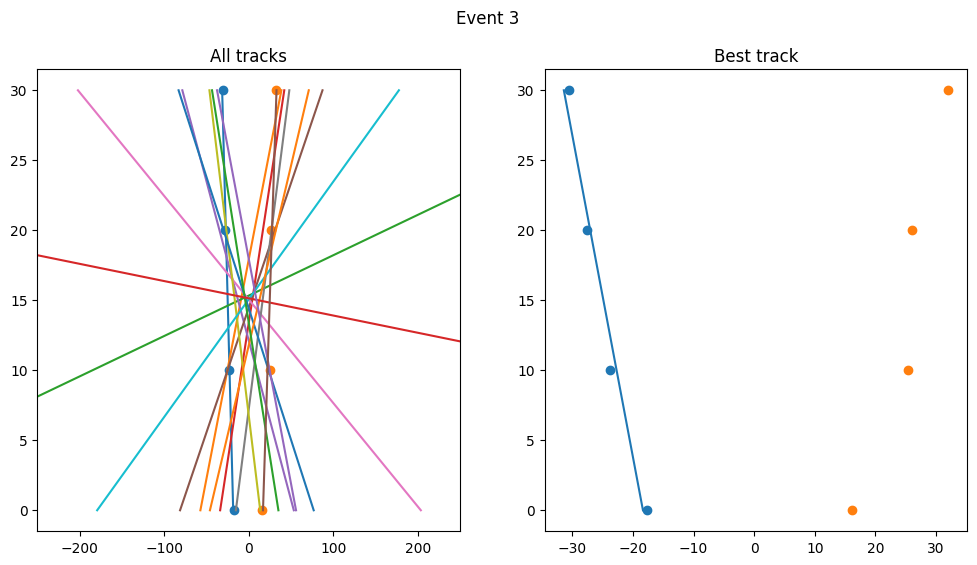

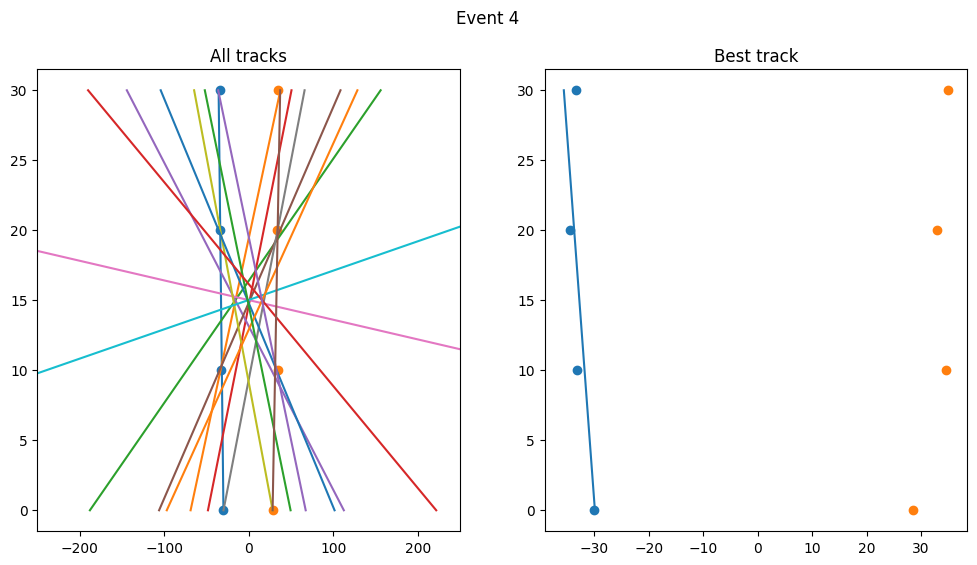

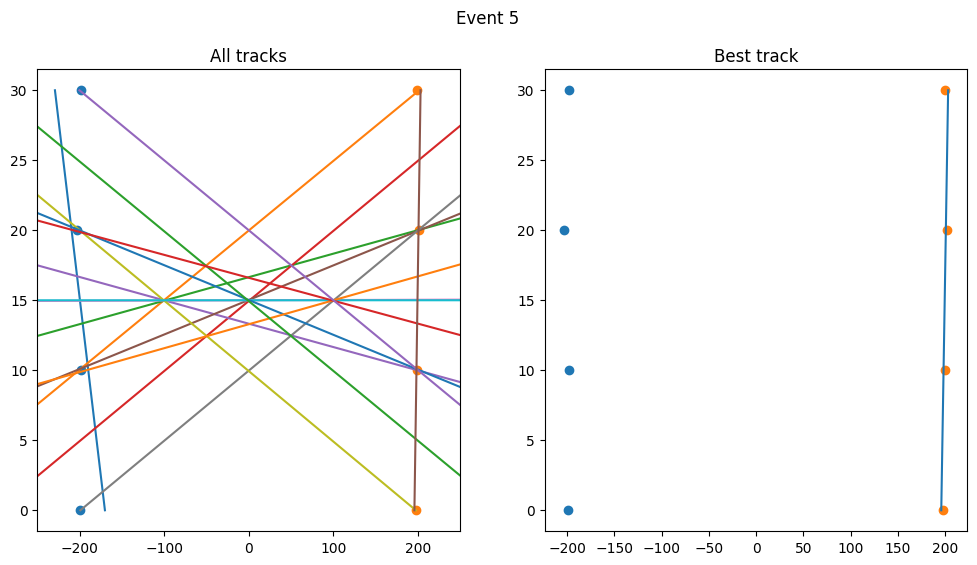

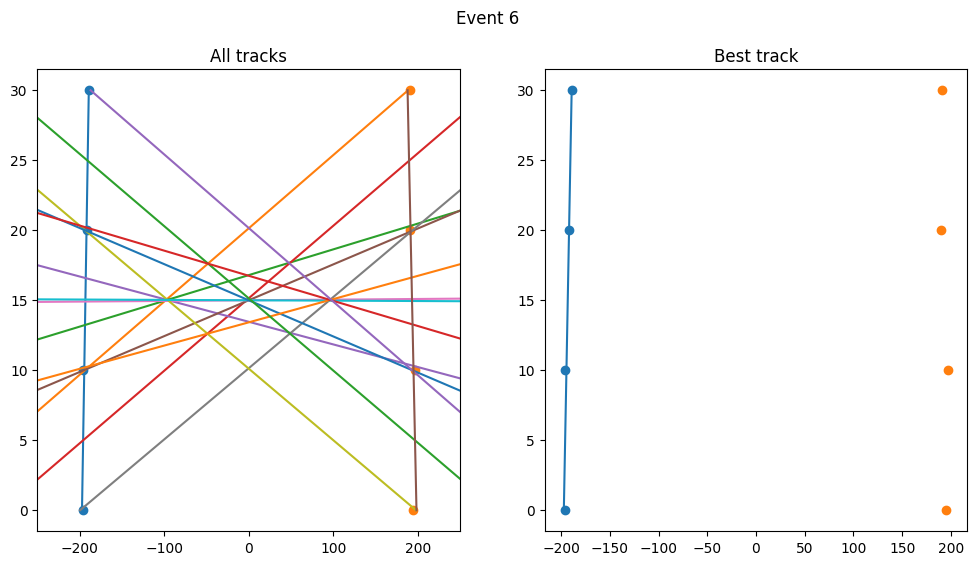

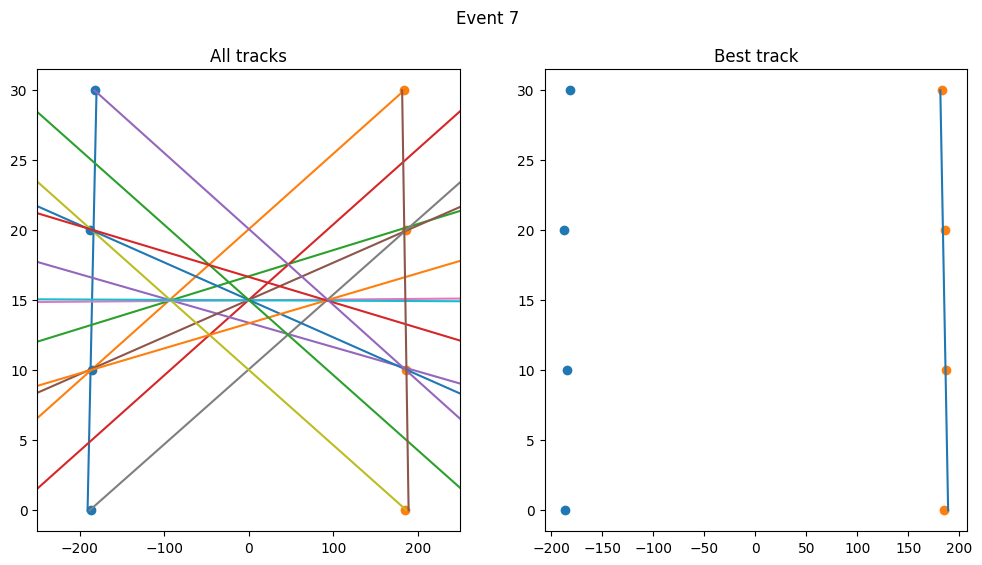

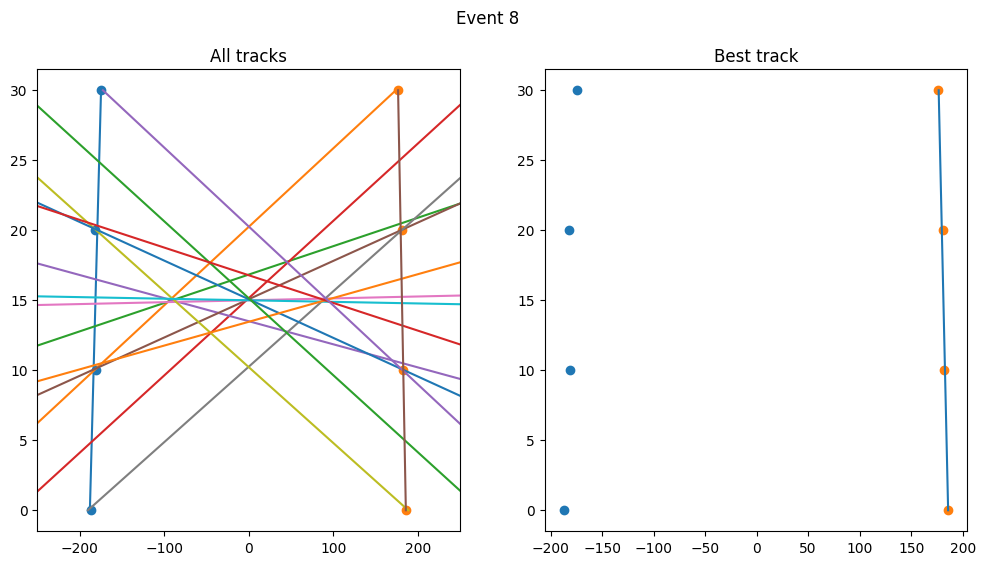

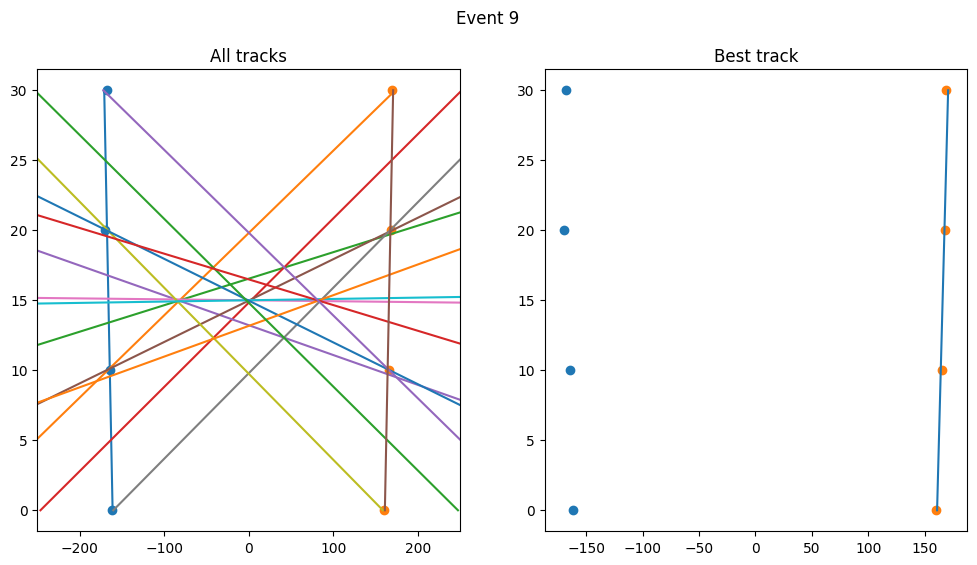

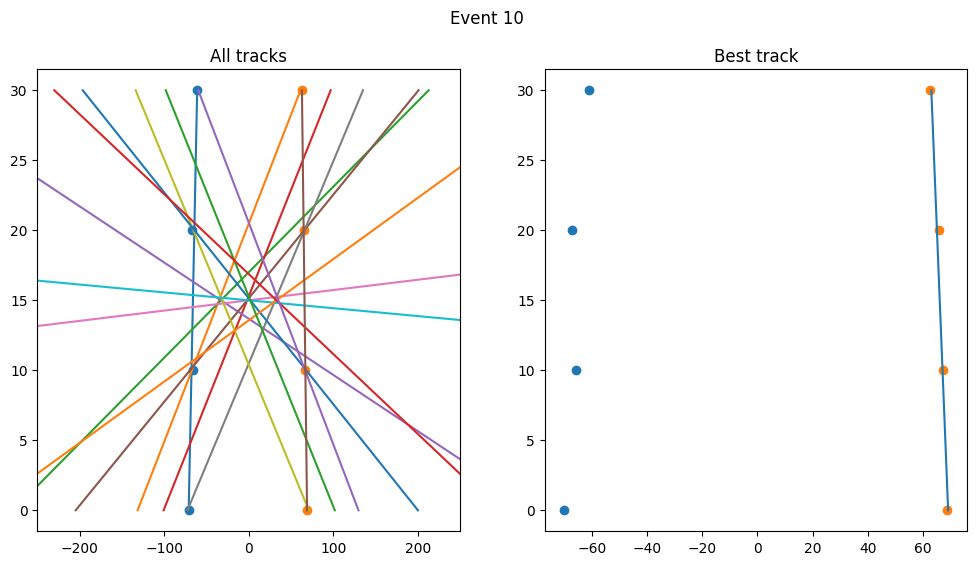

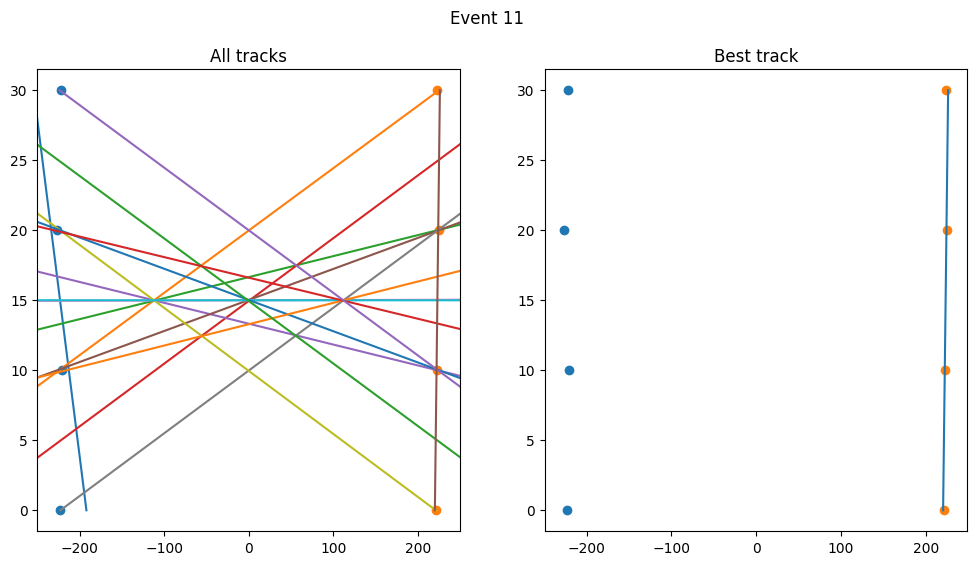

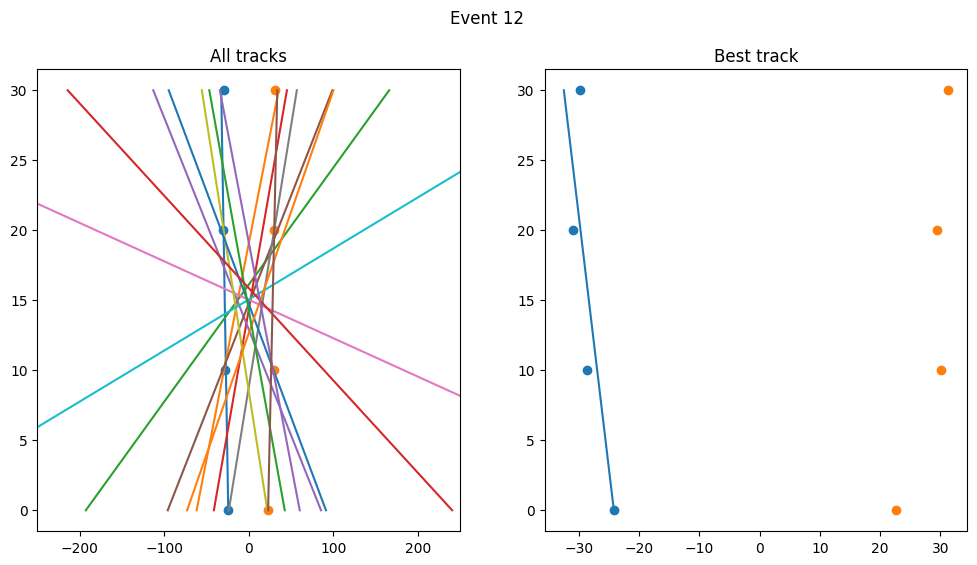

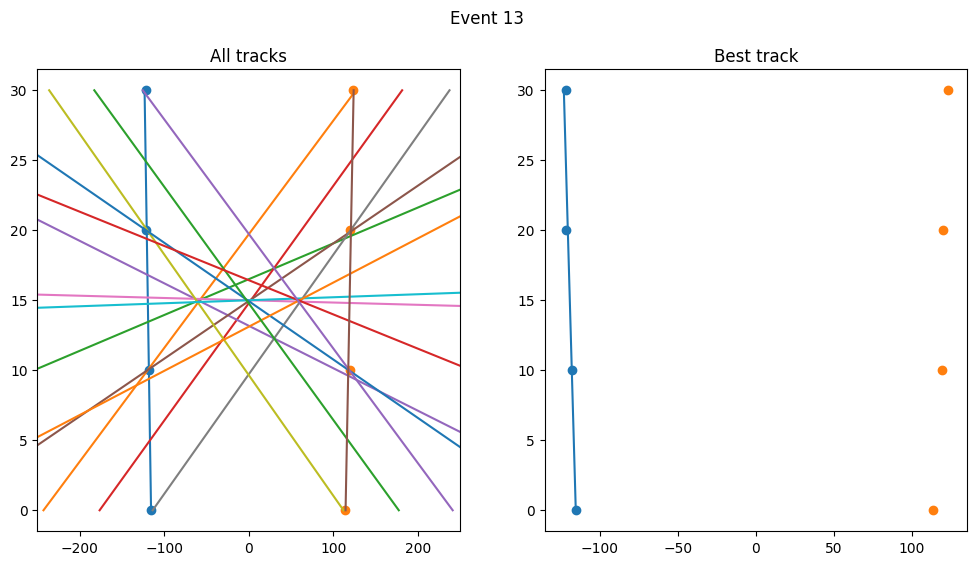

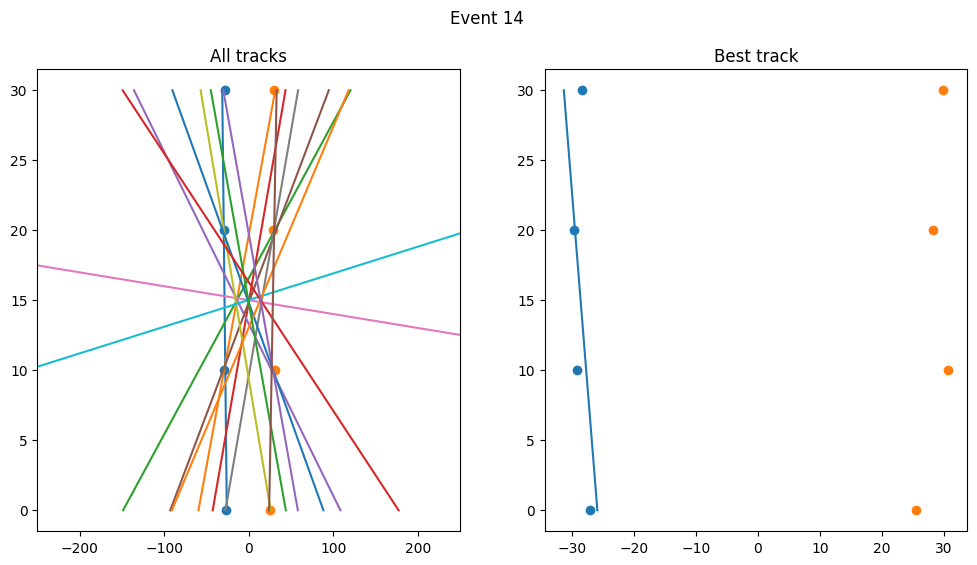

In [ ]:
import itertools
from sklearn.linear_model import LinearRegression

wire_x = [-0.75, 0.75, -0.75, 0.75]
y = np.array([0, 10, 20, 30])
y_s = np.array([-0.75, 0.75, -0.75, 0.75])
# проволоки попеременно смещены в направлении дрейфа на ±0.75 мм

# берем первые 10 строк, можно сделать чтобы рандомные 10 событий брались
# для простоты пока первые 10
for i in range(15):

    left = wire_x - df.loc[i] # точки слева
    rigth = wire_x + df.loc[i] # точки справа

    # тут создаются 16 возможных комбинаций 4 точек из 8 возможных точек
    list_all = [list(i) for i in zip(left, rigth)]
    combination = [p for p in itertools.product(*list_all)]

    # тут создаются два сабплота для отрисовки графиков
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    ax0.scatter(left, y)
    ax0.scatter(rigth, y)

    # max_k - параметр для поиска наилучшего наклона прямо
    # y = kx + b - такое уравнение возвращает лин рег
    # k - это tg(alpha), alpha - угол между прямой и осью х
    # чем круче наклон (т.е. чем больше k), тем вертикальней идет прямая
    max_k = 0

    # тут цикл обучения линейной регрессии для каждой комбинации точек
    # и поиск наилучшей комбинации точек 
    for comb in combination:
        x = np.array(comb).reshape(-1, 1)

        # создаем модель линейной регрессии, которая использует МНК для поиска прямой по сути
        reg = LinearRegression().fit(x, y)
        y_pred = reg.predict(x)

        k = reg.coef_[0]
        c = reg.intercept_
        # y = c + k*x
        x_min = (0 - c)/k
        x_max = (30 - c)/k

        ax0.set_title('All tracks')
        # ax0.plot(x, y_pred)
        ax0.plot([x_min,x_max], [0,30])
        ax0.set_xlim([-250, 250])

        if abs(reg.coef_[0]) > max_k:
            comb_dots = x
            max_k = abs(reg.coef_[0])
    

    # тут часть с отрисовкой лучшего трека
    reg = LinearRegression().fit(comb_dots, y)
    y_pred = reg.predict(comb_dots)

    k = reg.coef_[0]
    c = reg.intercept_
    # y = c + k*x
    x_min = (0 - c)/k
    x_max = (30 - c)/k

    ax1.set_title('Best track')
    ax1.scatter(left, y)
    ax1.scatter(rigth, y)

    ax1.plot([x_min,x_max], [0,30])

    fig.suptitle(f"Event {i}")
    plt.show()

In [ ]:
tmp = [1.8711880764919104, 1.118656732529707, 0.5942445414702591, 1.2600146824493366, -0.2729608850270158, 0.4731491489331391, 0.13916253350493218, 1.1522859645750987, -1.23303102439554, -0.019567284159582657, -0.5447948317910527, 0.5451332494978098, -1.0999670114920572, -0.34658410850267596, -1.2749674903389885, 4.466233203027062]
np.min([abs(t) for t in tmp])

0.019567284159582657

In [ ]:
import itertools
from sklearn.linear_model import LinearRegression

wire_x = [-0.75, 0.75, -0.75, 0.75]
y = np.array([0, 10, 20, 30])
y_s = np.array([-0.75, 0.75, -0.75, 0.75])
# проволоки попеременно смещены в направлении дрейфа на ±0.75 мм

k_for_all_events = []
for i in range(len(df)):

    left = wire_x - df.loc[i] # точки слева
    rigth = wire_x + df.loc[i] # точки справа

    # тут создаются 16 возможных комбинаций 4 точек из 8 возможных точек
    list_all = [list(i) for i in zip(left, rigth)]
    combination = [p for p in itertools.product(*list_all)]

    max_k = 0
    k_for_event = 0

    # тут цикл обучения линейной регрессии для каждой комбинации точек
    # и поиск наилучшей комбинации точек 
    # используем линейную регрессию, так как она основана на МНК
    for comb in combination:
        x = np.array(comb).reshape(-1, 1)

        reg = LinearRegression().fit(x, y)
        y_pred = reg.predict(x)

        if abs(reg.coef_[0]) > max_k:
            comb_dots = x
            max_k = abs(reg.coef_[0])
            k_for_event = reg.coef_[0]
    
    k_for_all_events.append(k_for_event)

In [ ]:
plt.hist(k_for_all_events,
         5000, 
         histtype ='bar')

In [ ]:
# k=tga
# a=arctgk
# K=90-arctg(k) для левых треков
# k=-90+arctg(k) для правых

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          5.,   0.,   1.,   3.,   0.,   1.,   2.,   1.,   0.,   0.,   2.,
          1.,   0.,   0.,   2.,   1.,   0.,   2.,   1.,   2.,   4.,   1.,
          1.,   2.,   0.,   2.,   4.,   2.,   5.,   7.,   6.,   1.,   6.,
          1.,   4.,   3.,   4.,   1.,   2.,   4.,   2.,   3.,   5.,   6.,
          9.,   6.,  11.,   3.,   4.,   7.,   7.,  13.,  13.,   7.,  10.,
          7.,  11.,  17.,   8.,  16.,  10.,  12.,   6.,  20.,  12.,  11.,
         11.,  21.,  10.,  13.,  23., 

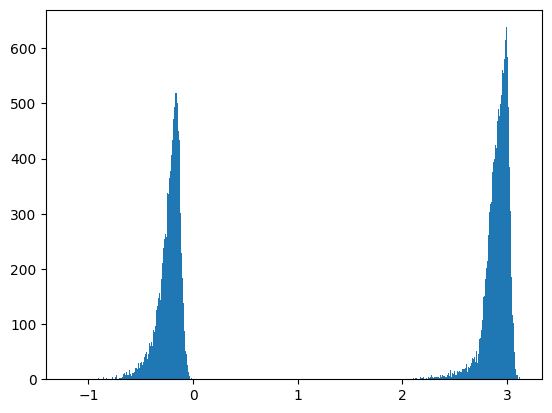

In [ ]:
# tmp = [(90 *np.pi/180) - np.arctan(i) for i in k_for_all_events if i > 0]
# list = [ x ** 2 if x % 2 else x for x in range (1, 101)]
tmp = [(90 *np.pi/180) - np.arctan(i) if i < 0 else np.arctan(i) - (90 *np.pi/180) for i in k_for_all_events]

plt.hist(tmp,
         1000, 
         histtype ='bar')

In [ ]:
plt.hist(tmp,
         1000, 
         histtype ='bar')

In [ ]:
import math

tmp_deg = [math.degrees(x) for x in tmp]

plt.hist(tmp_deg,
         1000, 
         histtype ='bar')

In [ ]:
tmp = [(90 *np.pi/180) - np.arctan(i) if i > 0 else np.arctan(i) - (90 *np.pi/180) for i in k_for_all_events]
tmp_deg = [math.degrees(x) for x in tmp]

tmp_pos = [abs(i) for i in tmp_deg]

In [ ]:
plt.hist(tmp_pos,
         1000, 
         histtype ='bar')

In [ ]:
# Python3 program for the above approach
from math import atan
 
# Function to find the
# angle between two lines
def findAngle(M1, M2):
    PI = 3.14159265
     
    # Store the tan value  of the angle
    angle = abs((M2 - M1) / (1 + M1 * M2))
 
    # Calculate tan inverse of the angle
    ret = atan(angle)
 
    # Convert the angle from
    # radian to degree
    val = (ret * 180) / PI
 
    # Print the result
    return val

# k_for_all_events

In [ ]:
k_for_all_events[:6]

[-8.421075984840718,
 -3.933720699781091,
 4.466233203027062,
 -2.297022216962861,
 -5.262239622149625,
 4.130340446928578]

In [ ]:
deg = [findAngle(i, 0) for i in k_for_all_events]

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([14.75921148, 14.78898969, 14.81876789, ..., 89.14516892,
        89.17494712, 89.20472533]),
 <BarContainer object of 2500 artists>)

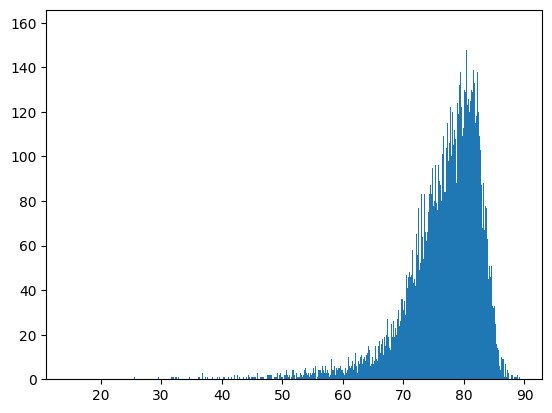

In [ ]:
plt.hist(deg,
         2500, 
         histtype ='bar')